In [1]:
import xarray as xr
import numpy as np
from netCDF4 import Dataset
import geopandas

# Reading GLDAS

The data can be obtained on NASA's project page at https://ldas.gsfc.nasa.gov/gldas.

In [4]:
# parallel ensures that it being parallel processing
ds_mean3 = xr.open_mfdataset("../../data/gldas/ymean3/wld_cli_*.nc4", parallel = True)
#ds_percentile390 = xr.open_mfdataset("../../data/gldas/ypercentile90/wld_cli_*.nc4", parallel = True)
# ds_mean4= xr.open_mfdataset("../../data/gldas/ymean4/wld_cli_*.nc4", parallel = True)
# ds_percentile490= xr.open_mfdataset("../../data/gldas/ypercentile490/wld_cli_*.nc4", parallel = True)
# ds_mean2=xr.open_mfdataset("../../data/gldas/ymean2/wld_cli_*.nc4", parallel = True)
# ds_percentile290=xr.open_mfdataset("../../data/gldas/ypercentile290/wld_cli_*.nc4", parallel = True)

In [5]:
#ds_2021 = xr.open_mfdataset("../data/GLDAS/ymean3/wld_cli_gldas21_tasmax_ydrunmean3_hwdi_2021.nc4")
#ds_2022 = xr.open_mfdataset("../../data/gldas/ymean3/wld_cli_gldas21_tasmax_ydrunmax3_hwdi_2022.nc4")
ds_2021 = xr.open_mfdataset("../../data/gldas/ymean3/wld_cli_gldas21_tasmax_ydrunmean3_hwdi_2021.nc4")

# Explore Data

In [7]:
time_bnds = [(np.datetime64('2022-03-01'), np.datetime64('2023-01-31'))]

In [8]:
time_var = ds_mean2.variables['time']

In [11]:
start_date = np.datetime64('2022-02-01')
end_date = np.datetime64('2022-04-30')

start_index = np.where(time_var[:] == start_date)[0]
end_index = np.where(time_var[:] == end_date)[0]


In [7]:
INDIA = geopandas.read_file('../../data/shapefiles/india_district/sh819zz8121.shp')
CHENNAI = INDIA[INDIA['laa']=='CHENNAI']

In [49]:
import rioxarray
from shapely.geometry import mapping
ds_mean3.rio.write_crs("epsg:4326", inplace=True)
clipped_chennai = ds_mean3.rio.clip(CHENNAI.geometry.apply(mapping), drop=False)

# ds_2021.rio.write_crs("epsg:4326", inplace=True)
# clipped_chennai = ds_2021.rio.clip(CHENNAI.geometry.apply(mapping), drop=False)

In [9]:
from rasterio.features import geometry_mask

geometry_mask(CHENNAI.geometry, transform = ds_mean3.transform, out_shape = ds_mean3.shape)


AttributeError: 'Dataset' object has no attribute 'transform'

In [8]:
from shapely import Point
lat = ds_mean3.variables['lat']
lon = ds_mean3.variables['lon']

mask = CHENNAI.geometry.contains(Point(lon, lat))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [48]:
INDIA.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
ds_mean3.rio.clip(CHENNAI.geometry.apply(mapping), drop=False)

MissingCRS: CRS not found. Please set the CRS with 'rio.write_crs()'. Data variable: heat_wave_duration_index_wrt_mean_of_reference_period

In [42]:
clipped_chennai

<xarray.Dataset>
Dimensions:                                                (time: 1, lon: 1440,
                                                            lat: 600)
Coordinates:
  * time                                                   (time) datetime64[ns] ...
  * lon                                                    (lon) float32 -179...
  * lat                                                    (lat) float32 -59....
    spatial_ref                                            int32 0
Data variables:
    heat_wave_duration_index_wrt_mean_of_reference_period  (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
    heat_waves_per_time_period                             (time, lat, lon) float32 dask.array<chunksize=(1, 600, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Tue Dec 13 10:34:39 2022: cdo -z zip_5 eca_hwdi,3,5 wld_cli...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [30]:
clipped_vietnam21.to_dataframe().reset_index().to_csv('../data/vietnam21_heatwaves.csv')

In [33]:
df['heat_wave_duration_index_wrt_mean_of_reference_period'].sum()

0.0

In [35]:
df = clipped_chennai.to_dataframe()

KeyboardInterrupt: 

In [16]:
df.to_csv('../data/vietnam_heatwaves_2022.csv')

In [14]:
df.reset_index()['time'].unique()

array(['2022-04-30T13:30:00.000000000'], dtype='datetime64[ns]')

In [52]:
ds_mean3_csv=ds_mean3_csv.reset_index()

In [1]:
import pandas as pd
ds_mean3_csv = pd.read_csv('../data/mean2_1948_2022.csv')

In [ ]:
delhi_box = [76.641723,28.362910,77.403075,28.989763]

In [7]:
delhi_box = ds_mean3_csv[(ds_mean3_csv['lon']>76.641723)&(ds_mean3_csv['lon']<77.403075)&(ds_mean3_csv['lat']>28.362910)&(ds_mean3_csv['lat']<28.989763)].reset_index(drop=True)

In [ ]:
DELHI

In [4]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

ds_mean3_csv['Point'] = ds_mean3_csv.apply(lambda x: Point(x['lat'], x['lon']), axis=1 )


In [ ]:
df_1 = ds_mean3_csv[ds_mean3_csv['Point'].apply(DELHI.contains)].copy()


In [9]:
import geopandas
gdf = geopandas.GeoDataFrame(
    delhi_box, geometry=geopandas.points_from_xy(delhi_box['lon'], delhi_box['lat']))

c:\Users\sahit\anaconda3\envs\datapartnership\lib\site-packages\geopandas\geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


<AxesSubplot:xlabel='time'>

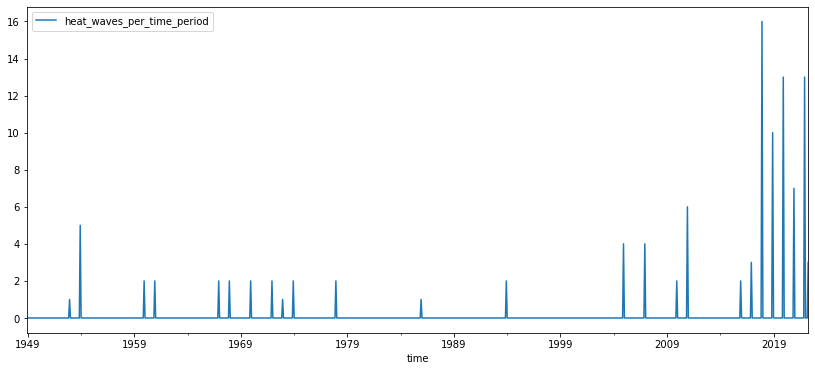

In [57]:
delhi_temp = gdf.sjoin(DELHI)[['time', 'heat_waves_per_time_period', 'lat', 'lon']]
delhi_temp['time'] = delhi_temp['time'].apply(lambda x: pd.to_datetime(x))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,6))
delhi_temp.groupby([pd.Grouper(key = 'time', freq='M')]).sum()[['heat_waves_per_time_period']].plot(ax=ax)#.to_csv('../data/delhi_heatwaves.csv')

In [58]:
delhi_temp.groupby([pd.Grouper(key = 'time', freq='M')]).sum()[['heat_waves_per_time_period']]

,heat_waves_per_time_period
time,
1948-12-31,0.0
1949-01-31,0.0
1949-02-28,0.0
1949-03-31,0.0
1949-04-30,0.0
...,...
2021-12-31,13.0
2022-01-31,0.0
2022-02-28,0.0


In [48]:
delhi_temp[delhi_temp['time'].dt.year>=2019]

,time,heat_waves_per_time_period,lat,lon
640,2019-12-31 13:30:00,7.0,28.625,76.875
643,2019-12-31 13:30:00,6.0,28.625,77.125
649,2020-12-31 13:30:00,3.0,28.625,76.875
652,2020-12-31 13:30:00,4.0,28.625,77.125
658,2021-12-31 13:30:00,7.0,28.625,76.875
661,2021-12-31 13:30:00,6.0,28.625,77.125
667,2022-04-30 13:30:00,2.0,28.625,76.875
670,2022-04-30 13:30:00,1.0,28.625,77.125


Text(0, 0.5, '# of heatwaves')

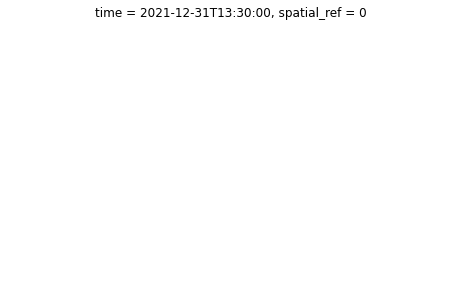

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,sharex=True, sharey=True, figsize = (8,5))


im = clipped['heat_waves_per_time_period'].plot(ax=ax, vmin = 0, vmax = 50)
#im2 = ds_2021['heat_waves_per_time_period'].plot(ax=ax[1], vmin = 0, vmax = 50)
#cbar_ax = fig.add_axes([0, 10, 20, 40])
#fig.colorbar(im, cax=cbar_ax)
#ax.axis('off')

# ax[0].set_title('1948')
# ax[1].set_title('2021')

#ax[0].get_legend().remove()

for i in [0,0]:
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axis('off')

handles, labels = ax.get_legend_handles_labels()
#print(labels)

cb = im.colorbar 
cb.remove()

# cb = im2.colorbar
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel('# of heatwaves', rotation=270)



Text(0, 0.5, '# of heatwaves')

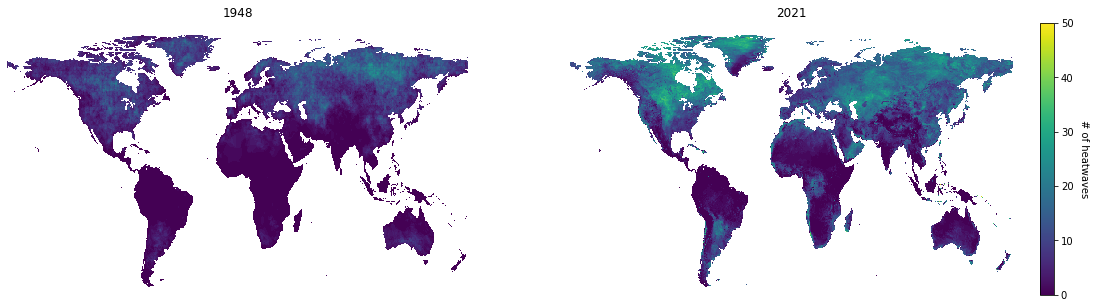

In [242]:
fig, ax = plt.subplots(1,2,sharex=True, sharey=True, figsize = (20,5),gridspec_kw={'width_ratios': [1, 1.2]})


im = ds_1948['heat_waves_per_time_period'].plot(ax=ax[0], vmin = 0, vmax = 50)
im2 = ds_2021['heat_waves_per_time_period'].plot(ax=ax[1], vmin = 0, vmax = 50)
#cbar_ax = fig.add_axes([0, 10, 20, 40])
#fig.colorbar(im, cax=cbar_ax)
#ax.axis('off')

ax[0].set_title('1948')
ax[1].set_title('2021')

#ax[0].get_legend().remove()

for i in [0,1]:
        
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].axis('off')

handles, labels = ax[1].get_legend_handles_labels()
#print(labels)

cb = im.colorbar 
cb.remove()

cb = im2.colorbar
cb.ax.get_yaxis().labelpad = 15
cb.ax.set_ylabel('# of heatwaves', rotation=270)



In [33]:

df_mean3 = ds_mean3.to_dataframe().groupby(['time', 'lat', 'lon']).sum()
df1_mean3 = df_mean3.groupby('time').sum()


In [166]:
df_percentile390 =  ds_percentile390.to_dataframe().groupby(['time']).sum()
df_percentile490 =  ds_percentile490.to_dataframe().groupby(['time']).sum()
df_percentile290 =  ds_percentile290.to_dataframe().groupby(['time']).sum()

df_mean2 = ds_mean2.to_dataframe().groupby(['time']).sum()


In [169]:
df_mean4 = ds_mean4.to_dataframe().groupby(['time']).sum()

In [120]:
# import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
# from matplotlib.collections import PatchCollection
# from matplotlib.colors import ListedColormap
# import pandas as pd

In [38]:
import matplotlib.pyplot as plt
from matploltib import ListedColormap
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

ModuleNotFoundError: No module named 'matploltib'

Text(0.5, 1.0, 'Number of heatwaves using different definitions of a heatwave')

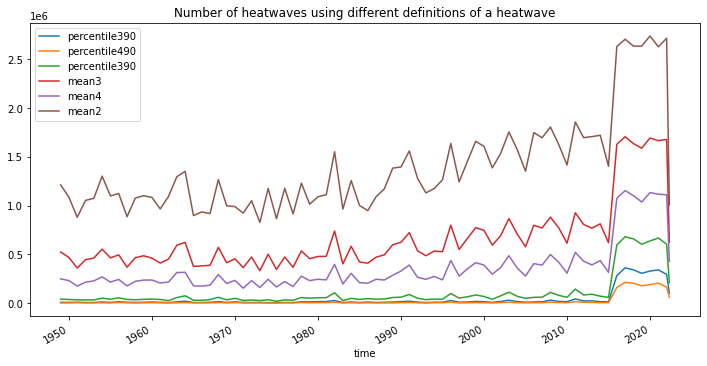

In [177]:
fig, ax = plt.subplots(1,1,sharex=True, sharey=True, figsize = (12,6))
df_percentile390[['heat_waves_per_time_period']].plot(ax=ax, label = 'percentile390')
df_percentile490[['heat_waves_per_time_period']].plot(ax=ax)
df_percentile290[['heat_waves_per_time_period']].plot(ax=ax)

df_mean3[['heat_waves_per_time_period']].plot(ax=ax)
df_mean4[['heat_waves_per_time_period']].plot(ax=ax)
df_mean2[['heat_waves_per_time_period']].plot(ax=ax)

plt.legend(('percentile390', 'percentile490', 'percentile390', 'mean3', 'mean4', 'mean2'),
           loc='upper left')
plt.title('Number of heatwaves using different definitions of a heatwave')

In [246]:
df_percentile290.rename(columns = {'heat_waves_per_time_period':'heat_waves_per_time_period_p290'}, inplace = True)
df_percentile390.rename(columns = {'heat_waves_per_time_period':'heat_waves_per_time_period_p390'}, inplace = True)
df_percentile490.rename(columns = {'heat_waves_per_time_period':'heat_waves_per_time_period_p490'}, inplace = True)

df_mean2.rename(columns = {'heat_waves_per_time_period':'heat_waves_per_time_period_m2'}, inplace = True)
df_mean3.rename(columns = {'heat_waves_per_time_period':'heat_waves_per_time_period_m3'}, inplace = True)
df_mean4.rename(columns = {'heat_waves_per_time_period':'heat_waves_per_time_period_m4'}, inplace = True)

In [251]:
#df_mean4.merge(df_mean3, on = 'time')

In [254]:
df_mean4.merge(df_mean3,on = 'time').merge(df_mean2,on = 'time').merge(df_percentile290,on = 'time').merge(df_percentile390,on = 'time').merge(df_percentile490,on = 'time').to_excel('../data/heatwave_definitions.xlsx')

In [192]:
ds.sel(time=slice("2021-01-01", "2021-12-31")).plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

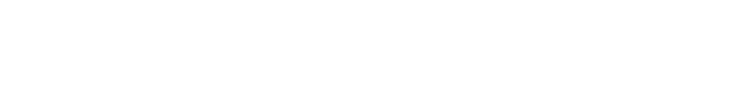

In [132]:
fig = plt.figure(figsize=(10, 1))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

# create a collection with a rectangle for each year

col = PatchCollection([
    Rectangle((y, 0), 1, 1)
    for y in range(1948, 2022 + 1)
])

# reference = df1['heat_waves_per_time_period'].mean()
# heat_waves = df1['heat_waves_per_time_period'].dropna()

# col.set_array(heat_waves)
# col.set_cmap(cmap)
# col.set_clim(reference, reference)
# ax.add_collection(col)